# Task 1. Filling in the gaps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('dataset.csv', sep = ',')

In [3]:
data.describe()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
count,48.000000,48.000000,45.000000,46.000000,48.000000,48.000000,48.000000,43.000000,48.000000
mean,31.041667,1275.932292,3271.511111,2526.130435,4.198271,0.205812,11.398646,15621.992256,6.591667
std,17.526828,588.245674,914.087421,667.773585,0.954574,0.168566,1.333656,5745.320548,1.994443
min,0.000000,106.150000,1837.000000,755.500000,1.598000,0.010000,10.021000,344.583000,2.000000
25%,16.750000,935.175000,2530.500000,2086.000000,3.563000,0.090000,10.350750,12424.258500,5.000000
50%,31.500000,1284.325000,3062.000000,2473.250000,4.429000,0.155000,11.005000,15027.517000,6.000000
75%,45.250000,1631.850000,3900.000000,3033.250000,4.693750,0.260000,12.113750,18505.750000,8.000000
max,60.000000,2653.950000,5345.000000,4089.000000,6.235000,0.770000,15.648000,26874.000000,10.000000


In [4]:
data.isnull().sum()

Well_id               0
Reservoir Pressure    0
ISIP                  3
Closure Pressure      2
PAD Volume            0
Fluid Efficiency      0
Transmissibility      0
Total Prop Mass       5
Max Prop Conc         0
dtype: int64

In [5]:
data

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
0,0,1250.50,2129.5,1861.0,4.892,0.149,12.685,16787.317,7.0
1,2,946.75,2850.5,2413.5,5.005,0.240,10.236,14543.000,5.0
2,3,1515.00,3782.5,3054.5,4.995,0.100,10.667,14366.000,5.0
3,4,2390.55,3449.5,3048.0,4.457,0.040,10.765,15406.000,5.0
4,8,655.95,NaN,2290.0,3.563,0.080,12.254,15504.917,7.0
5,9,1837.95,4592.5,3053.0,4.988,0.360,10.404,14162.417,5.0
6,10,927.00,3503.0,2331.0,4.404,0.290,10.986,16674.917,5.0
7,11,1634.70,3758.5,2694.5,4.988,0.020,12.067,12597.417,5.0
8,12,1318.15,4253.0,3202.5,4.628,0.160,10.248,11694.583,5.0
9,13,1140.40,3062.0,2369.0,4.454,0.090,13.169,15655.500,5.0


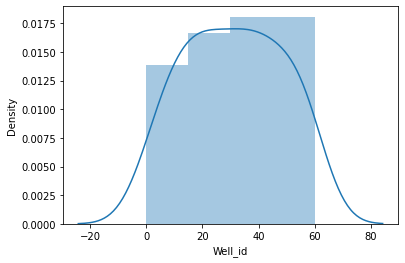

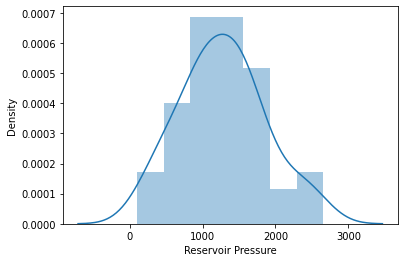

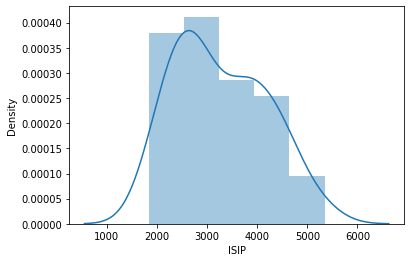

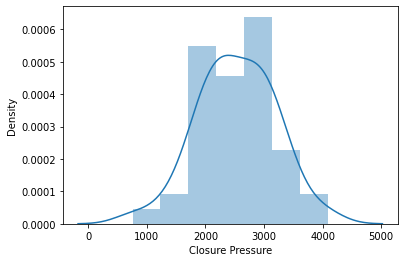

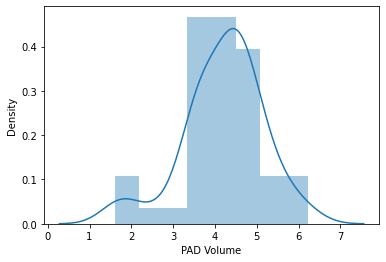

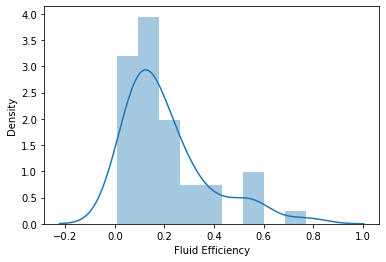

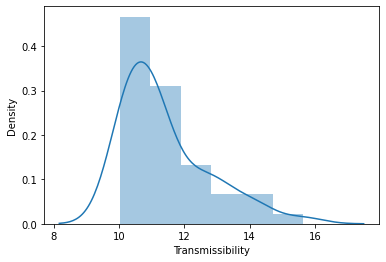

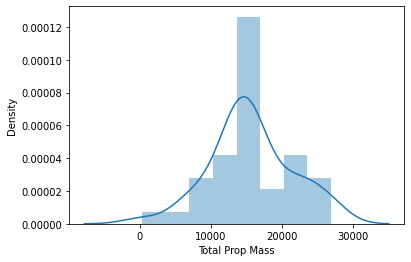

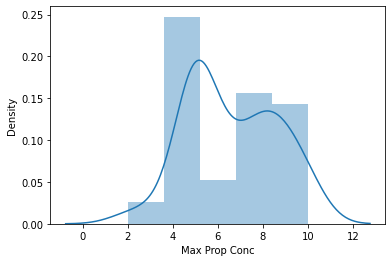

In [6]:
for i in data:
    plt.figure()
    sns.distplot(data[i])
    plt.np.median(data[i])

In [7]:
data['ISIP'], data['Closure Pressure'], data['Total Prop Mass'] = data.fillna(data['ISIP'].median()), data.fillna(data['Closure Pressure'].median()), data.fillna(data['Total Prop Mass'].median())

# Task 2. Identifying dependencies

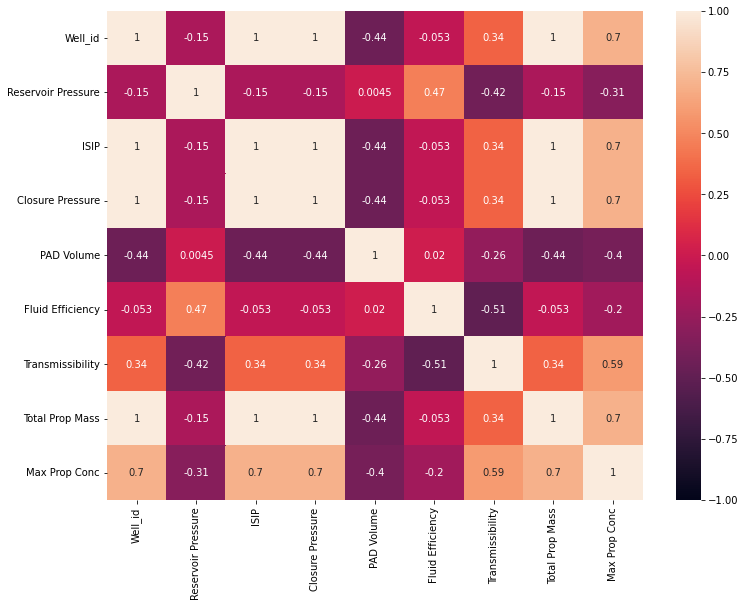

In [8]:
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

# Task 3. Building a predictive model

In [9]:
y_train = data['Max Prop Conc']
x_train = data.drop(['Max Prop Conc'], axis=1)
x_train.head()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass
0,0,1250.50,0.0,0.0,4.892,0.149,12.685,0.0
1,2,946.75,2.0,2.0,5.005,0.240,10.236,2.0
2,3,1515.00,3.0,3.0,4.995,0.100,10.667,3.0
3,4,2390.55,4.0,4.0,4.457,0.040,10.765,4.0
4,8,655.95,8.0,8.0,3.563,0.080,12.254,8.0


In [10]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [11]:
scores = -1 * cross_val_score(my_pipeline, x_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 1.0958488888888889


In [12]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, x_train, y_train,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [13]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

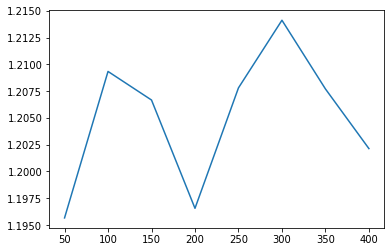

In [14]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [15]:
n_estimators_best = min(results, key=results.get)
n_estimators_best

50